In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
import os

In [3]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
path= 'C:\\Users\\Amit\\Downloads\\'

In [5]:
df= pd.read_csv(path+"weatherAUS.csv")

In [6]:
df=df.drop(['Date','Evaporation', 'Sunshine','Cloud9am','Cloud3pm','Date'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df.Location)
df['WindGustDir']=le.fit_transform(df.WindGustDir)
df['WindDir9am']=le.fit_transform(df.WindDir9am)
df['WindDir3pm']=le.fit_transform(df.WindDir3pm)
df['RainToday']=le.fit_transform(df.RainToday)
df['RainTomorrow']=le.fit_transform(df.RainTomorrow)

In [8]:
from numpy import NaN
df[np.isnan(df)]=0

In [9]:
x=df.drop(['RainTomorrow'],axis=1)
x= df.iloc[:, [3,5]].values # min and max temperature :2
y=df['RainTomorrow']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [13]:
#print(x)

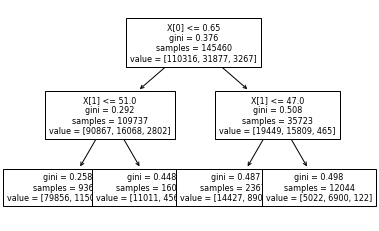

In [14]:
plot_tree(tree_clf,fontsize=8);

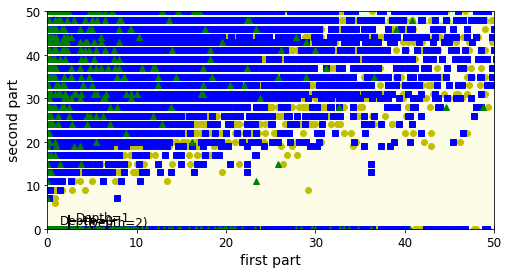

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 50, 0, 50], rain=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not rain:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="first")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="second")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="third")
        plt.axis(axes)
    if rain:
        plt.xlabel("first part", fontsize=14)
        plt.ylabel("second part", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, x, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=12)
plt.text(3.2, 1.80, "Depth=1", fontsize=12)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=12)

plt.show()

In [16]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.60927404, 0.37624055, 0.01448541]])

In [17]:
tree_clf.predict([[5, 1.5]])

array([0])

In [18]:
x[(x[:, 1]==x[:, 1][y==1].max()) & (y==1)]

array([[ 61.4, 135. ],
       [  0. , 135. ],
       [  2.6, 135. ]])

In [19]:
not_widest_versicolor = (x[:, 1]!=1.8) | (y==2)
X_tweaked = x[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

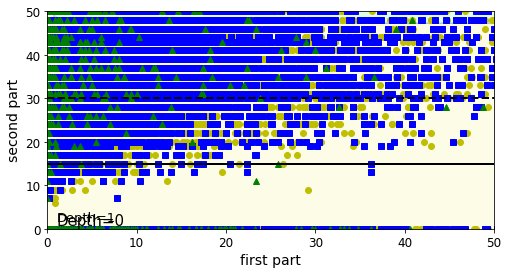

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 50], [15, 15], "k-", linewidth=2)
plt.plot([0, 50], [30, 30], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.show()

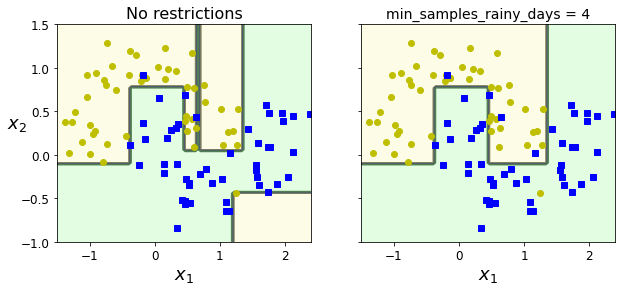

In [21]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], rain=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], rain=False)
plt.title("min_samples_rainy_days = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()

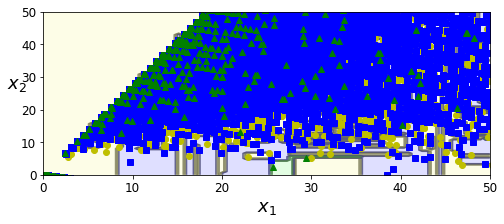

In [22]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = x.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0, 50, 0, 50], rain=False)

plt.show()

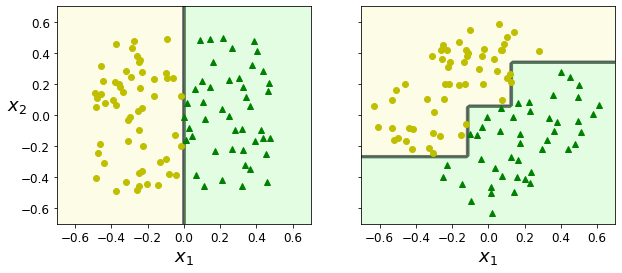

In [23]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], rain=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], rain=False)
plt.ylabel("")
plt.show()

In [24]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

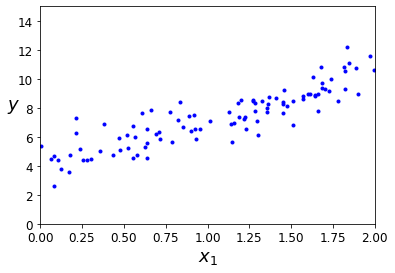

In [25]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [27]:
theta_best

array([[4.05175588],
       [3.10812381]])

In [28]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.05175588],
       [10.26800351]])

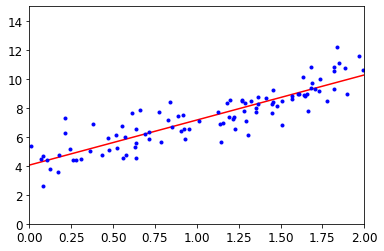

In [29]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.05175588]), array([[3.10812381]]))

In [31]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [32]:
lin_reg.predict(X_new)

array([[ 4.05175588],
       [10.26800351]])

In [33]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.05175588],
       [3.10812381]])

In [34]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100      #batch size is 100 samples      

theta = np.random.randn(2,1)  # random initialization of the weights
#
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)# This is the gradient descent iteration  - m is for the batch version
    theta = theta - eta * gradients  

In [35]:
theta

array([[4.05175588],
       [3.10812381]])

In [36]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

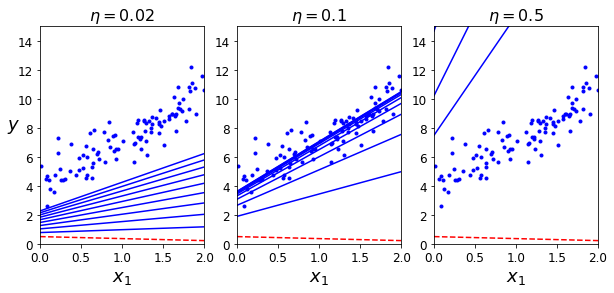

In [37]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

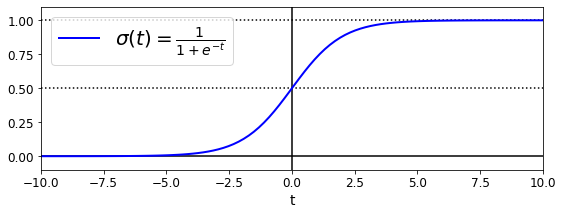

In [38]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [39]:
np.shape(y)

(100, 1)

In [40]:
x=df.drop(['RainTomorrow'],axis=1)
x = df.iloc[:, 3:]  # 3rd onward column
y = (df['RainTomorrow'] == 3).astype(np.int)  # we should change the value
       

C:\Users\Amit\AppData\Local\Temp\ipykernel_8824\2391737573.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (df['RainTomorrow'] == 3).astype(np.int)  # we should change the value


In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)

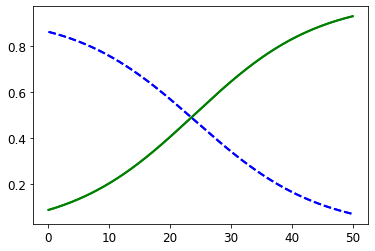

In [42]:
X_new = np.linspace(0, 50, 1000).reshape(-1, 2)
y_proba = lr.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Rain")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="NoRain")

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

InvalidIndexError: (slice(None, None, None), None)

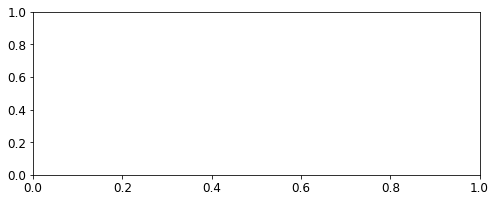

In [46]:
X_new = np.linspace(0, 50, 1000).reshape(-1, 2)
y_proba = lr.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5]

plt.figure(figsize=(8, 3))
plt.plot(x[y==10], y[y==0], "bs")
plt.plot(x[y==50], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Rain")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="NoRain")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Rain", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()